# Finlatics Case Project - BANKING

# Banking Dataset

Term deposits serve as a significant revenue stream for banks, representing cash investments held within financial institutions. These investments involve committing funds for a predetermined period, during which they accrue interest at an agreed-upon rate. To promote term deposits, banks employ various outreach strategies including email marketing, advertisements, telephonic marketing, and digital marketing.

Despite the advent of digital channels, telephonic marketing campaigns persist as one of the most effective means of engaging customers. However, they necessitate substantial investment due to the requirement of large call centers to execute these campaigns. Therefore, it becomes essential to pre-identify potential customers likely to convert, enabling targeted outreach efforts via phone calls.
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).


Content
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

Banking_data.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
Detailed Column Descriptions: 
age: This column represents the age of the bank client. It's a numeric variable indicating the age in years.

job: This column indicates the type of job the client has. It's a categorical variable with options such as "admin.", "unknown", "unemployed", "management", etc.

marital: This column represents the marital status of the client. It's a categorical variable with options such as "married", "divorced", or "single".

education: This column indicates the level of education of the client. It's a categorical variable with options such as "unknown", "secondary", "primary", or "tertiary".

default: This column indicates whether the client has credit in default. It's a binary variable with options "yes" or "no".

balance: This column represents the average yearly balance in euros for the client. It's a numeric variable.

housing: This column indicates whether the client has a housing loan. It's a binary variable with options "yes" or "no".

loan: This column indicates whether the client has a personal loan. It's a binary variable with options "yes" or "no".

contact: This column represents the type of communication used to contact the client. It's a categorical variable with options such as "unknown", "telephone", or "cellular".

day: This column represents the last contact day of the month. It's a numeric variable.

month: This column represents the last contact month of the year. It's a categorical variable with options such as "jan", "feb", "mar", etc.

duration: This column represents the duration of the last contact in seconds. It's a numeric variable.

campaign: This column represents the number of contacts performed during this campaign and for this client. It's a numeric variable.

pdays: This column represents the number of days that passed by after the client was last contacted from a previous campaign. It's a numeric variable where -1 means the client was not previously contacted.

previous: This column represents the number of contacts performed before this campaign and for this client. It's a numeric variable.

poutcome: This column represents the outcome of the previous marketing campaign. It's a categorical variable with options such as "unknown", "other", "failure", or "success".

y: This column is the target variable and indicates whether the client has subscribed to a term deposit. It's a binary variable with options "yes" or "no".


CORE CODE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r"Datasets/banking_data.csv")
df


,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


In [2]:
df.head

<bound method NDFrame.head of        age           job   marital marital_status  education default  balance  \
0       58    management   married        married   tertiary      no     2143   
1       44    technician    single         single  secondary      no       29   
2       33  entrepreneur   married        married  secondary      no        2   
3       47   blue-collar   married        married    unknown      no     1506   
4       33       unknown    single         single    unknown      no        1   
...    ...           ...       ...            ...        ...     ...      ...   
45211   29    management    single         single   tertiary      no      765   
45212   68       retired   married        married  secondary      no     1146   
45213   53    management   married        married   tertiary      no      583   
45214   73       retired   married        married  secondary      no     2850   
45215   71       retired  divorced       divorced    primary      no     1729  

In [3]:
df.tail()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes
45215,71,retired,divorced,divorced,primary,no,1729,no,no,cellular,17,nov,17-Nov,456,2,-1,0,unknown,yes


QUESTIONS:

1.	What is the distribution of age among the clients?

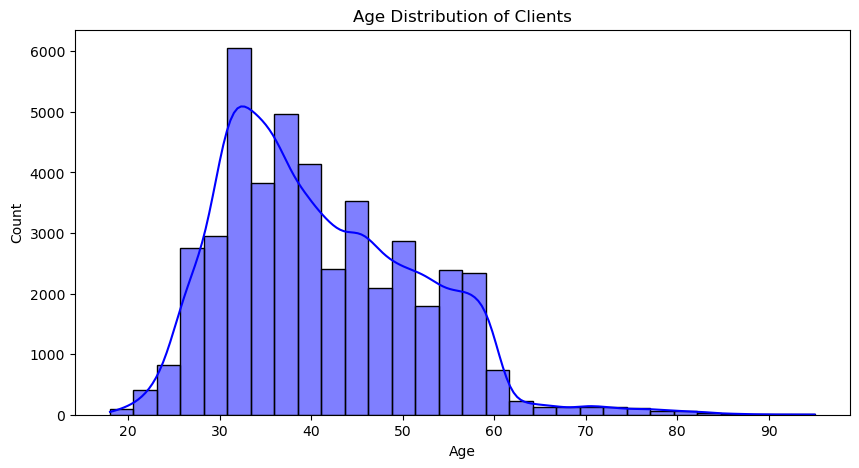

In [4]:

# Plot the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Clients")

# Show the plot
plt.show()


Key Takeaways:

Youngest client: 18 years old

Oldest client: 95 years old

Average age: ~41 years

Most clients are between 32 and 48 years old (IQR: Interquartile range)

2.	How does the job type vary among the clients?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\3922261945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette='viridis')


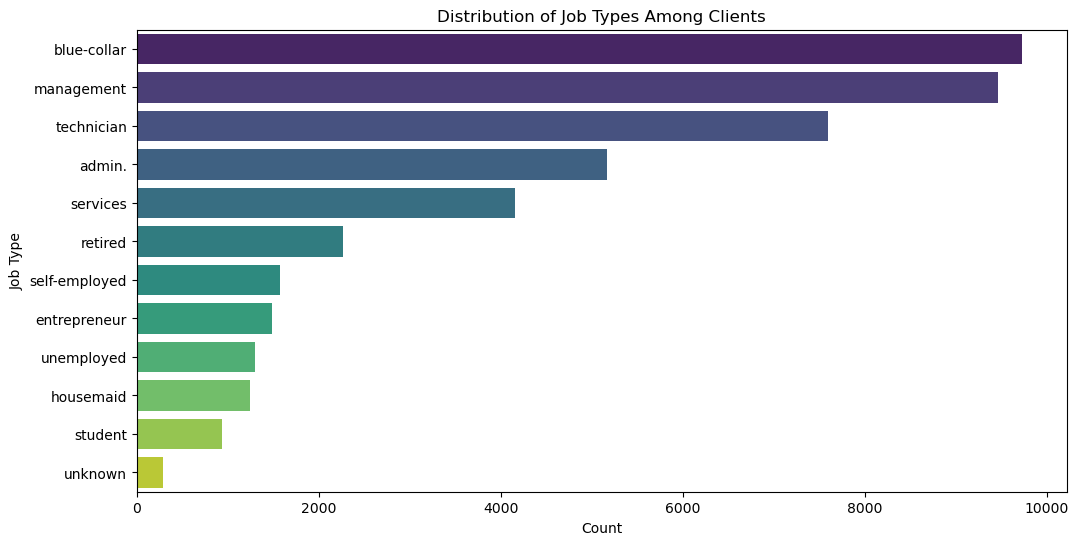

In [6]:
# Plot the count of each job type
plt.figure(figsize=(12, 6))
sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette='viridis')

# Labels and title
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.title("Distribution of Job Types Among Clients")

# Show the plot
plt.show()


Key Takeaways:

The most common job types among clients are:

Blue-collar workers (9,732 clients or ~21.5%)

Management professionals (9,458 clients or ~20.9%)

Technicians (7,597 clients or ~16.8%)

Other notable groups include:

Administrative staff (5,171 clients or ~11.4%)

Service sector employees (4,154 clients or ~9.2%)

Retirees (2,264 clients or ~5.0%)

Self-employed individuals & entrepreneurs (3,066 clients combined)

Less common job types:

Students (938 clients or ~2.1%)

Housemaids (1,240 clients or ~2.7%)

Unemployed individuals (1,303 clients or ~2.9%)

Unknown job type:

293 clients (~0.6%) have an unknown job status.

The top 3 job categories are blue-collar, management, and technician, making up nearly 59% of the clients.

There is a significant retired, self-employed, and unemployed population.

A small proportion of clients are students and housemaids.

3.	What is the marital status distribution of the clients?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\2941185190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['marital'], order=df['marital'].value_counts().index, palette='pastel')


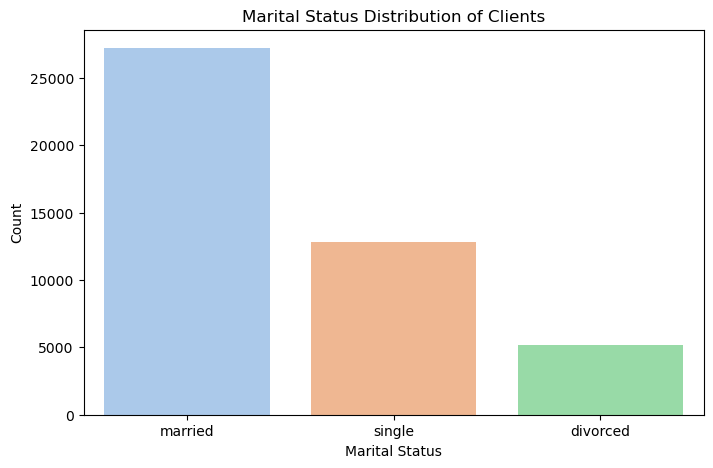

In [7]:
# Plot the count of each marital status
plt.figure(figsize=(8, 5))
sns.countplot(x=df['marital'], order=df['marital'].value_counts().index, palette='pastel')

# Labels and title
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution of Clients")

# Show the plot
plt.show()


Summary:

The majority of clients (60.2%) are married.

About 28.3% of clients are single.

A smaller proportion (11.5%) are divorced.

4.	What is the level of education among the clients?

C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\2714049163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['education'], order=df['education'].value_counts().index, palette='Set2')


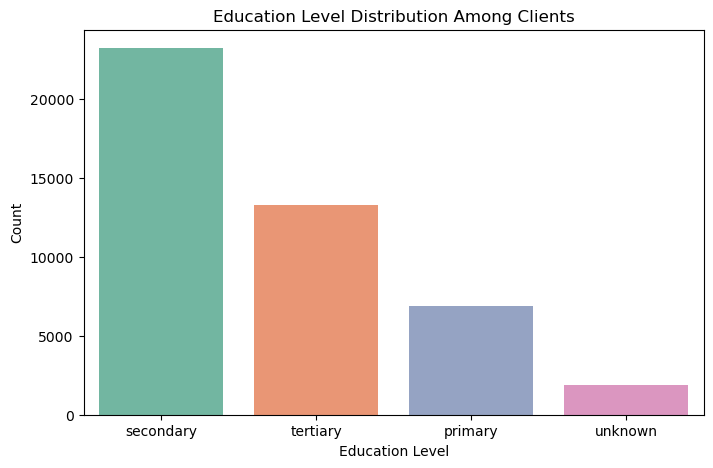

In [8]:
# Plot the count of each education level
plt.figure(figsize=(8, 5))
sns.countplot(x=df['education'], order=df['education'].value_counts().index, palette='Set2')

# Labels and title
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level Distribution Among Clients")

# Show the plot
plt.show()


Summary:

The majority of clients (51.3%) have completed secondary education.

About 29.4% of clients have a tertiary-level education.

A smaller proportion (15.2%) have only primary education.

The education level of 4.1% of clients is unknown.

5.	What proportion of clients have credit in default?

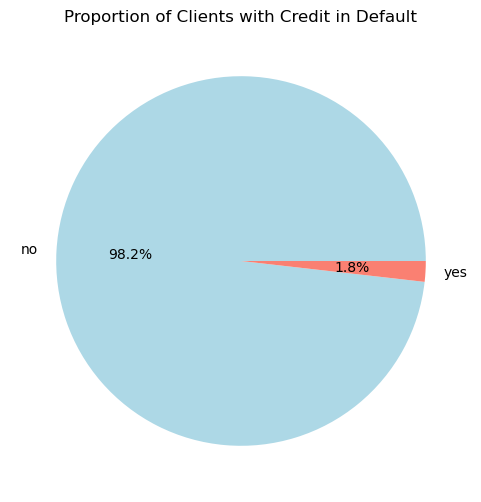

In [9]:
# Calculate the proportion of clients with credit in default
default_counts = df['default'].value_counts(normalize=True) * 100

# Plot the proportion
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Proportion of Clients with Credit in Default")

# Show the plot
plt.show()


Key Takeaways :
Clients in default: 820

Total clients: 45,216

Proportion of clients in default: 1.81%

This means that only 1.81% of the clients have credit in default, while the majority (about 98.19%) do not. Would you like further insights, such as how default status correlates with subscription to term deposits?

6.	What is the distribution of average yearly balance among the clients?


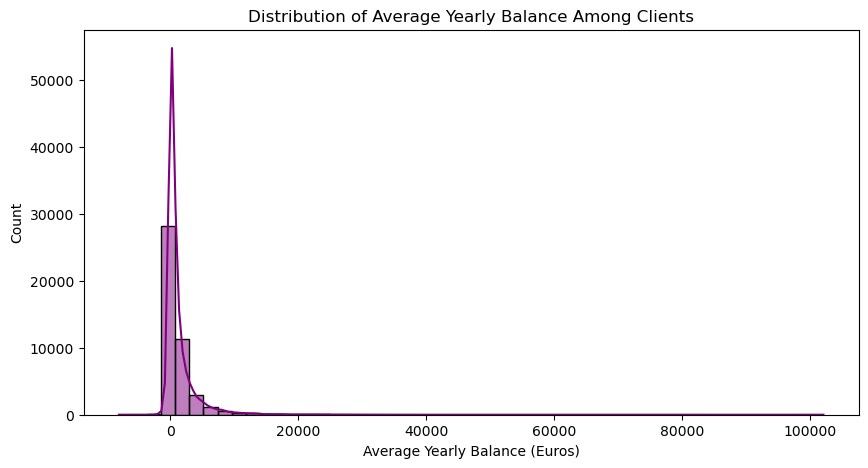

In [3]:
# Plot the distribution of balance
plt.figure(figsize=(10, 5))
sns.histplot(df['balance'], bins=50, kde=True, color='purple')

# Labels and title
plt.xlabel("Average Yearly Balance (Euros)")
plt.ylabel("Count")
plt.title("Distribution of Average Yearly Balance Among Clients")

# Show the plot
plt.show()


Key Insights:
Highly skewed distribution:

The mean (₹1,362) is much higher than the median (₹448.5), indicating a right-skewed distribution (a few clients have very high balances).

Presence of Negative Balances:

The minimum value is ₹-8,019, suggesting some clients might have debts or overdrafts.

Most clients have relatively low balances:

75% of the clients have balances below ₹1,428, showing that a small fraction of clients hold significantly higher balances.

7.	How many clients have housing loans?


housing
yes    25130
no     20086
Name: count, dtype: int64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\3702621472.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='coolwarm')


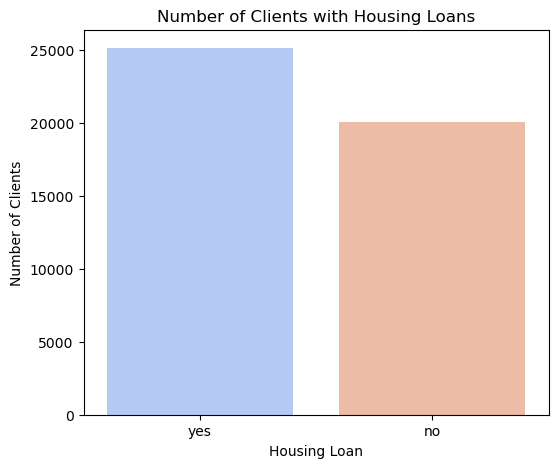

In [11]:
# Count the number of clients with and without housing loans
housing_counts = df['housing'].value_counts()

# Print the count
print(housing_counts)

# Plot the distribution
plt.figure(figsize=(6, 5))
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='coolwarm')

# Labels and title
plt.xlabel("Housing Loan")
plt.ylabel("Number of Clients")
plt.title("Number of Clients with Housing Loans")

# Show the plot
plt.show()


Key Observations:

A slight majority (~55.6%) of clients have housing loans, indicating that more than half of the clients are homeowners with active loans.

Around 44.4% do not have housing loans, possibly due to renting, already repaid loans, or other financial factors.

8.	How many clients have personal loans?


loan
no     37972
yes     7244
Name: count, dtype: int64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\1106695993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=personal_loan_counts.index, y=personal_loan_counts.values, palette='viridis')


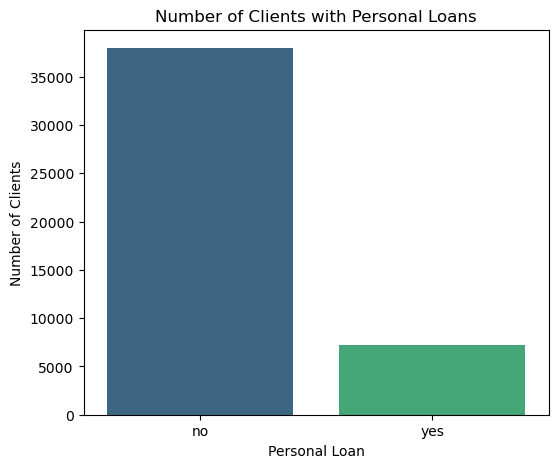

In [12]:
# Count the number of clients with and without personal loans
personal_loan_counts = df['loan'].value_counts()

# Print the count
print(personal_loan_counts)

# Plot the distribution
plt.figure(figsize=(6, 5))
sns.barplot(x=personal_loan_counts.index, y=personal_loan_counts.values, palette='viridis')

# Labels and title
plt.xlabel("Personal Loan")
plt.ylabel("Number of Clients")
plt.title("Number of Clients with Personal Loans")

# Show the plot
plt.show()


Key Observations:

A large majority (~84%) of clients do not have personal loans.

Only about 16% of clients have taken a personal loan, which might indicate financial stability or preference for other loan types.

9.	What are the communication types used for contacting clients during the campaign?


contact
cellular     29290
unknown      13020
telephone     2906
Name: count, dtype: int64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\3328083277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='Set1')


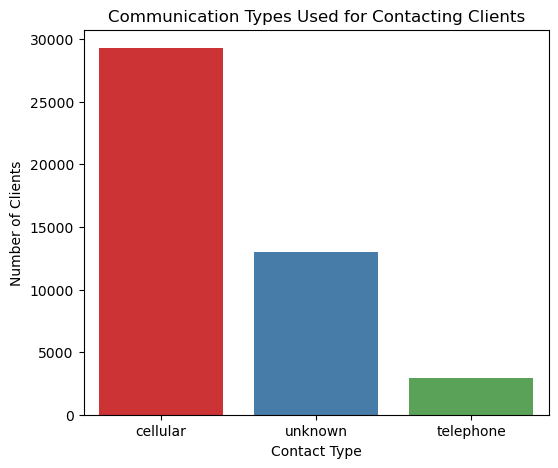

In [13]:
# Count the number of clients contacted via each communication type
contact_counts = df['contact'].value_counts()

# Print the count
print(contact_counts)

# Plot the distribution
plt.figure(figsize=(6, 5))
sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='Set1')

# Labels and title
plt.xlabel("Contact Type")
plt.ylabel("Number of Clients")
plt.title("Communication Types Used for Contacting Clients")

# Show the plot
plt.show()


Key Insights:
Mobile phones were the dominant method, likely due to their accessibility and convenience.

A significant portion (13k) of contacts have an "unknown" type, which may impact analysis—checking how these clients responded could be useful.

Landline use was minimal compared to mobile phones, possibly indicating a shift away from traditional telemarketing.

10.	What is the distribution of the last contact day of the month?


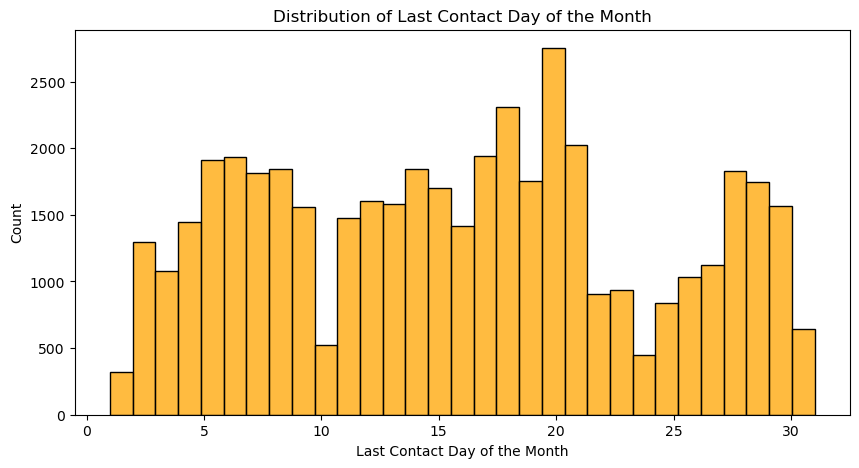

In [14]:
# Plot the distribution of last contact day
plt.figure(figsize=(10, 5))
sns.histplot(df['day'], bins=31, kde=False, color='orange')

# Labels and title
plt.xlabel("Last Contact Day of the Month")
plt.ylabel("Count")
plt.title("Distribution of Last Contact Day of the Month")

# Show the plot
plt.show()
# Count the number of clients contacted via each communication type
contact_counts = df['day'].value_counts()

Observations from the Data:

🔹 The most frequent contact days were 20th (2752 contacts), 18th (2308), and 21st (2026).

🔹 The least contacted days were 1st (322 contacts), 24th (447), and 10th (524).

🔹 The contacts seem to peak around mid to late month (14th-21st and 28th-30th), possibly indicating a campaign push near the month's end.

11.	How does the last contact month vary among the clients?


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3975
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


C:\Users\sedhu\AppData\Local\Temp\ipykernel_1980\1926291749.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun',


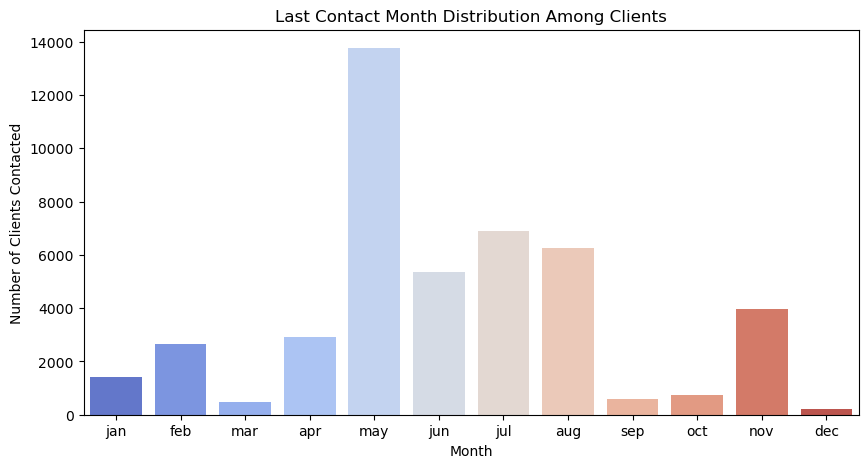

In [15]:
# Count the number of contacts per month
month_counts = df['month'].value_counts()

# Print the count
print(month_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                                'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette='coolwarm')

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Clients Contacted")
plt.title("Last Contact Month Distribution Among Clients")

# Show the plot
plt.show()


Key Observations:

🔹 May has the highest number of contacts (13,766 clients), making it the busiest month for the campaign.

🔹 July and August are also high-contact months.

🔹 December has the fewest contacts (only 214), indicating a low marketing effort or seasonal inactivity.

🔹 Most contacts happen from April to August, possibly targeting mid-year financial decisions.

12.	What is the distribution of the duration of the last contact?


Text(0.5, 1.0, 'Distribution of Last Contact Duration')

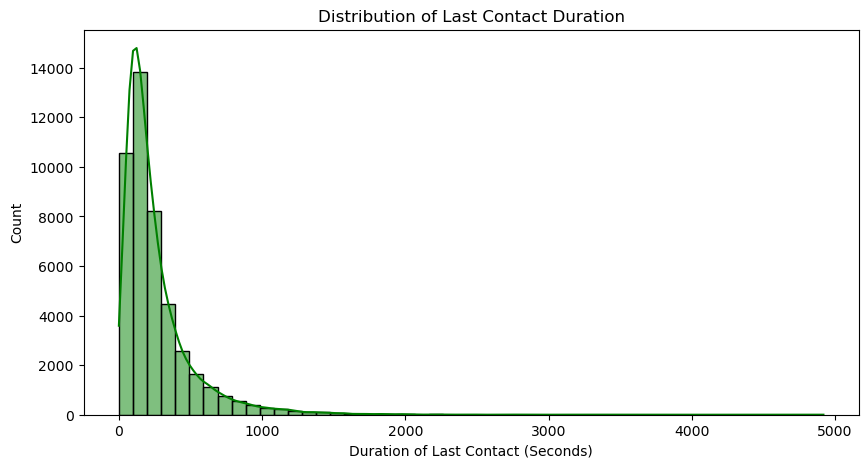

In [5]:
# Plot the distribution of last contact duration
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=50, kde=True, color='green')

# Labels and title
plt.xlabel("Duration of Last Contact (Seconds)")
plt.ylabel("Count")
plt.title("Distribution of Last Contact Duration")



The duration column represents the length of the last contact with a client (in seconds).

Key Insights from the Summary Statistics:
plaintext
Copy
Edit
count    45216.000000
mean       258.163150
std        259.856666
min          0.000000
25%         103.000000
50%         180.000000
75%         319.000000
max       4918.000000
Total clients: 45,216

Mean (average) duration: ~258 seconds (~4.3 minutes)

Standard deviation: 259 seconds (high variation)

Minimum: 0 seconds (some calls ended immediately, possibly failures)

25th percentile (Q1): 103 seconds (~1.7 minutes)

50th percentile (Median, Q2): 180 seconds (~3 minutes)

75th percentile (Q3): 319 seconds (~5.3 minutes)

Maximum: 4918 seconds (~82 minutes, very long call)

Key Takeaways:

🔹 Most calls lasted between 1.7 to 5.3 minutes.

🔹 Some calls lasted 0 seconds, indicating failed or unanswered calls.

🔹 Longer calls might indicate more engaged customers.

13.	How many contacts were performed during the campaign for each client?


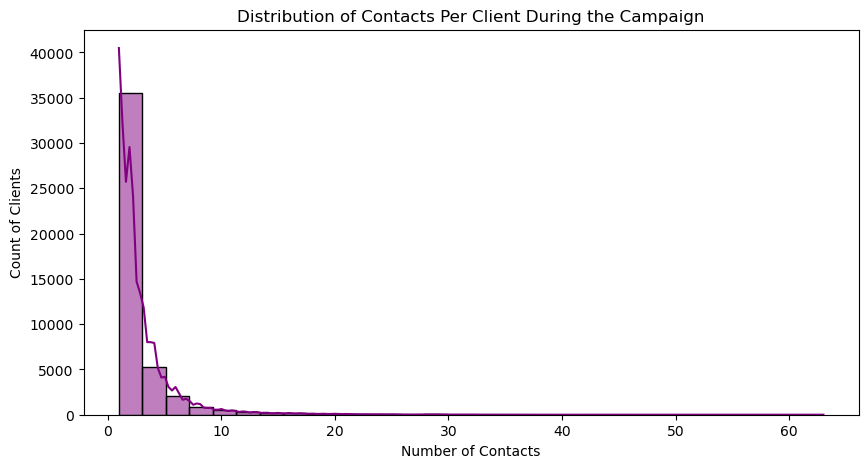

In [6]:
# Plot the distribution of the number of contacts per client
plt.figure(figsize=(10, 5))
sns.histplot(df['campaign'], bins=30, kde=True, color='purple')

# Labels and title
plt.xlabel("Number of Contacts")
plt.ylabel("Count of Clients")
plt.title("Distribution of Contacts Per Client During the Campaign")

# Show the plot
plt.show()




Key Insights from the Summary Statistics:
Total clients: 45,216

Mean (average) contacts per client: 2.76

Standard deviation: 3.09 (moderate variation)

Minimum: 1 (every client was contacted at least once)

25th percentile (Q1): 1 (25% of clients were contacted only once)

50th percentile (Median, Q2): 2 (most clients were contacted twice)

75th percentile (Q3): 3 (75% of clients had three or fewer contacts)

Maximum: 63 contacts (some clients were contacted excessively)

Key Takeaways:

🔹 Most clients were contacted 1 to 3 times during the campaign.

🔹 A small group of clients were contacted a lot (up to 63 times).

🔹 This suggests the need to check whether too many contacts negatively affect subscription rates.



14.	What is the distribution of the number of days passed since the client was last contacted from a previous campaign?


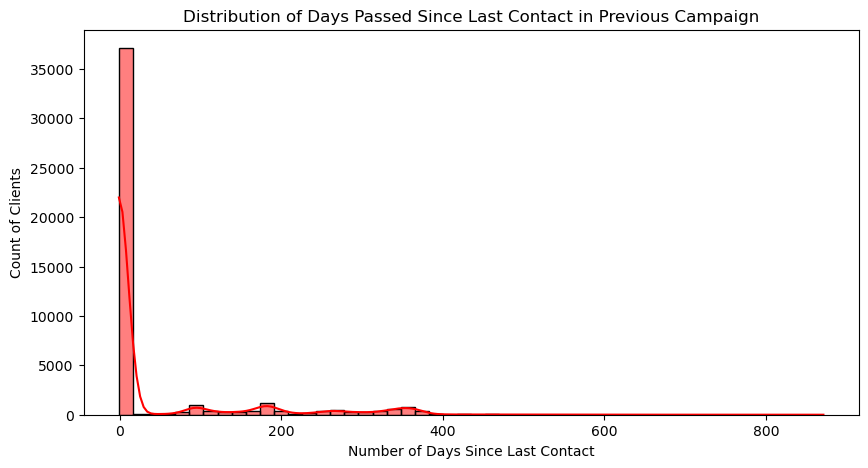

In [7]:
# Plot the distribution of pdays
plt.figure(figsize=(10, 5))
sns.histplot(df['pdays'], bins=50, kde=True, color='red')

# Labels and title
plt.xlabel("Number of Days Since Last Contact")
plt.ylabel("Count of Clients")
plt.title("Distribution of Days Passed Since Last Contact in Previous Campaign")

# Show the plot
plt.show()




The pdays column represents the number of days passed since the client was last contacted from a previous campaign.

Key Insights from the Summary Statistics:
Total clients: 45,216

Mean (average): 40.2 days

Standard deviation: 100.1 (high variance)

Minimum: -1 (indicates clients were never contacted before)

25th, 50th, and 75th percentiles: All are -1, meaning most clients were never contacted before.

Maximum: 871 days (some clients were contacted almost 2.5 years ago).

Key Takeaways:

🔹 The value -1 dominates (indicating no previous contact for most clients).

🔹 Some clients were contacted long ago, with a maximum of 871 days.

🔹 The high standard deviation (100.1 days) suggests large differences between clients.



15.	How many contacts were performed before the current campaign for each client?


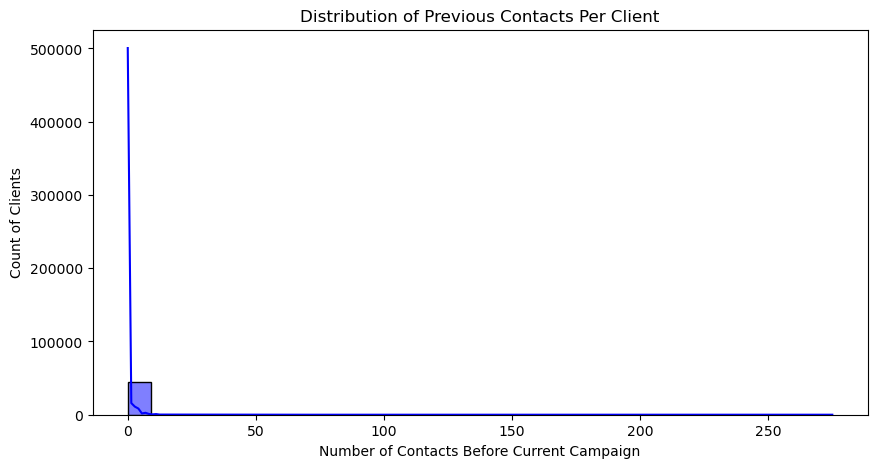

In [8]:
# Plot the distribution of previous contacts
plt.figure(figsize=(10, 5))
sns.histplot(df['previous'], bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Number of Contacts Before Current Campaign")
plt.ylabel("Count of Clients")
plt.title("Distribution of Previous Contacts Per Client")

# Show the plot
plt.show()



The summary statistics for the number of contacts performed before the current campaign (previous column) indicate:

Total clients: 45,216

Mean (average): 0.58 contacts per client

Standard deviation: 2.30 (high variation)

Minimum: 0 contacts (many clients had no prior contacts)

25th, 50th, 75th percentiles: All are 0, meaning most clients had no prior contacts before the current campaign.

Maximum: 275 contacts (a few clients were contacted many times before).

🔹 Most clients were not contacted before the current campaign (since 75% have 0 contacts).

🔹A small number of clients were contacted multiple times, up to 275 times.

🔹 There is a high variance, meaning some clients were contacted repeatedly while most were not.

16.	What were the outcomes of the previous marketing campaigns?


C:\Users\sedhu\AppData\Local\Temp\ipykernel_14820\3875855997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['poutcome'], order=df['poutcome'].value_counts().index, palette="coolwarm")


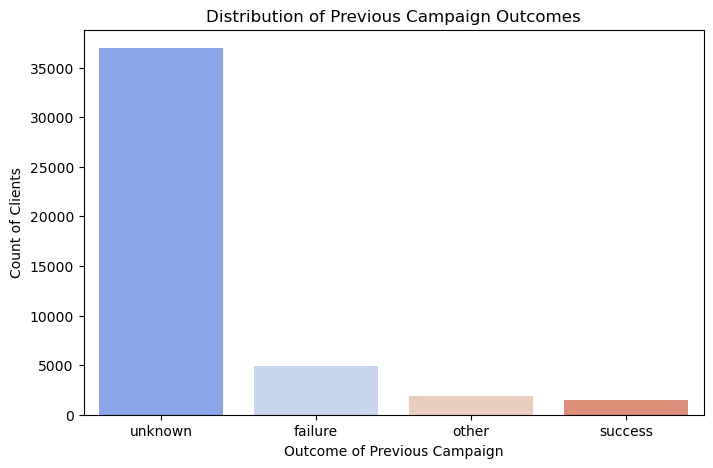

In [4]:
# Countplot for previous campaign outcomes
plt.figure(figsize=(8, 5))
sns.countplot(x=df['poutcome'], order=df['poutcome'].value_counts().index, palette="coolwarm")

# Labels and title
plt.xlabel("Outcome of Previous Campaign")
plt.ylabel("Count of Clients")
plt.title("Distribution of Previous Campaign Outcomes")

# Show the plot
plt.show()




The outcomes of the previous marketing campaigns are as follows:

Unknown: 36,961 clients (~82.8%) – These clients had no recorded outcome from previous campaigns.

Failure: 4,902 clients (~11%) – The previous campaign was not successful.

Other: 1,840 clients (~4.1%) – The outcome was categorized as "other" (not explicitly success or failure).

Success: 1,513 clients (~3.4%) – The previous campaign was successful.

17.	What is the distribution of clients who subscribed to a term deposit vs. those who did not?


C:\Users\sedhu\AppData\Local\Temp\ipykernel_14820\3392857819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['y'], palette="viridis")


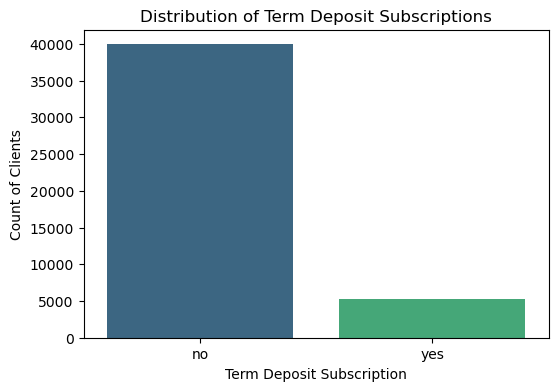

In [9]:
# Countplot for subscription distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'], palette="viridis")

# Labels and title
plt.xlabel("Term Deposit Subscription")
plt.ylabel("Count of Clients")
plt.title("Distribution of Term Deposit Subscriptions")

# Show the plot
plt.show()



The distribution of clients who subscribed (yes) vs. those who did not (no) is:

No: 39,922 clients (did not subscribe)

Yes: 5,294 clients (subscribed)

This shows that only about 11.7% of the clients subscribed to a term deposit, while the majority (about 88.3%) did not.

18.	Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?


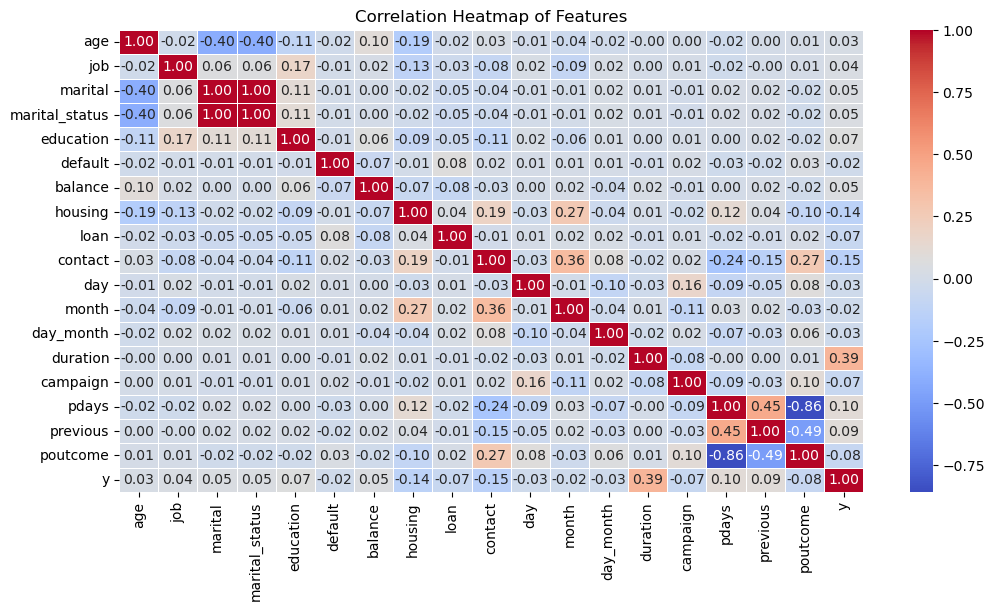

In [10]:
# Convert target variable 'y' to numerical (1 for 'yes', 0 for 'no')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical features using Label Encoding
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns  # Select categorical columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numerical
    label_encoders[col] = le  # Store encoders if needed later

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Features")

# Show the plot
plt.show()




Most Influential Feature:

duration (0.39) has the highest positive correlation with subscribing to a term deposit. This means the longer the call duration, the higher the chance of subscription.

Moderately Positive Correlations:

pdays (0.10) and previous (0.09) suggest that clients previously contacted are slightly more likely to subscribe.

education and balance also show small positive correlations.

Negative Correlations (Discouraging Subscription):

housing (-0.14) and contact (-0.15) suggest that clients with housing loans and certain contact methods are less likely to subscribe.

campaign (-0.07) means that more contact attempts may actually reduce success.